# DLA Cluster

Implementation of Diffusion Limited Aggregation(DLA) cluster. http://wiki.cs.umt.edu/classes/cs477/index.php/DLA_Assignment

In [2]:
import numpy as np
from time import sleep
from IPython.display import clear_output
from matplotlib import pyplot as plt
from scipy.stats import linregress
%matplotlib inline

In [56]:
class DLA:

    def __init__(self, lattice_width=61):
        self.L = lattice_width // 2
        self.lattice_dim = (lattice_width, lattice_width)
        self.lattice = self.lattice = np.zeros((lattice_width, lattice_width), dtype=np.int8).tolist()
        self.lattice[self.L][self.L] = 1

        self.num_particles = 1
        self.ring_size = self.L // 10
        self.start_radius = 3
        self.max_radius = self.ring_size + self.start_radius

        self.cycles = 0
        self.complete = False

    def reset(self):
        self.__init__()
        return None

    def iterate(self):
        """
        Iterate through one cycle of adding a particle to the cluster.

        :return: None
        """
        x = 0
        y = 0
        if self.start_radius < self.L:

            theta = 2 * np.pi * np.random.random()
            x = self.L + int(self.start_radius * np.cos(theta))
            y = self.L + int(self.start_radius * np.sin(theta))
            self.walk(x, y)

        else:
            self.complete = True

        self.cycles += 1

        return None

    def walk(self, x, y):
        """
        From position (x,y), randomly walk until you exceed maximum radius or stick to cluster.

        :param x: x coordinate
        :param y: y coordinate
        :return: None
        """

        walking = True

        while walking:
            r_squared = (x - self.L) ** 2 + (y - self.L) ** 2
            r = 1 + int(np.sqrt(r_squared))
            if r > self.max_radius:
                walking = False

            elif r < self.L and (self.lattice[x+1][y] + self.lattice[x-1][y] + self.lattice[x][y+1] + self.lattice[x][y-1] > 0):
                self.num_particles += 1
                self.lattice[x][y] = 1
                if r >= self.start_radius:
                    self.start_radius = r+2
                self.max_radius = self.start_radius + self.ring_size
                walking = False
            else:
                direction = np.random.randint(0,4)
                if direction == 0:
                    x += 1
                elif direction == 1:
                    x -= 1
                elif direction == 2:
                    y += 1
                else:
                    y -= 1

        return None

    def center_of_mass(self):
        """
        Gets current center of mass in lattice coordinates.

        :return tuple: (x, y)
        """
        x, y = np.where(np.array(self.lattice) == 1)
        x = np.sum(x) // self.num_particles
        y = np.sum(y) // self.num_particles
        return np.array(x, y)

    def get_radius(self):
        x_pts, y_pts = np.where(np.array(self.lattice) == 1)
        pts = []
        for x, y in zip(x_pts,y_pts):
            pts.append((x,y))
        pts = np.array(pts, dtype=np.float32)
        pts = pts - self.center_of_mass()
        r = np.sqrt(pts[:, 0] ** 2 + pts[:, 1] ** 2)
        return r

    def animate(self):
        """
        Iterate through the space until cluster is completely surrounded by dead cells.

        :return: None
        """
        plt.figure()
        while not self.complete:
            self.plot()
            self.iterate()
            sleep(0.01)
            clear_output(wait=True)
        self.plot()

        return None

    def plot(self):
        """
        Plot current lattice configuration.

        :return: None
        """
        plt.figure()
        plt.title("World Size: {}x{}\nIteration: {}\nParticles: {}".format(self.L,
                                                                           self.L,
                                                                           self.cycles,
                                                                           self.num_particles))

        plt.imshow(self.lattice)
        plt.show()

        return None

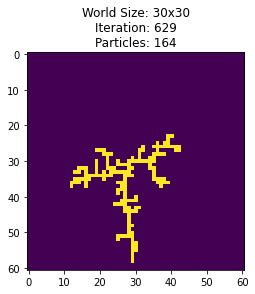

In [10]:
big_DLA = DLA()
big_DLA.animate()

## 1) L = 61

In [61]:
L = 61
DLA_sim = DLA(lattice_width=L)
N_bins = 8
N_sim = 10
min_size = 0.1 * L/2
max_size = 0.65 * L/2
freq_array = np.zeros(N_bins)

for _ in range(N_sim):
    DLA_sim.reset()
    while not DLA_sim.complete:
        DLA_sim.iterate()
    r = DLA_sim.get_radius()
    r.sort()
    count, bin_edg = np.histogram(r, range=(min_size, max_size), bins=N_bins)
    freq_array += np.cumsum(count)

DLA_CDF = freq_array / N_sim

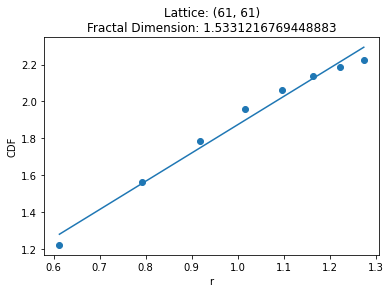

In [64]:

x_discrete = (bin_edg[1:] + bin_edg[0:-1]) /  2
regress = linregress(np.log10(x_discrete), np.log10(DLA_CDF))

x = np.log10(np.linspace(x_discrete[0], x_discrete[-1], 200))
y = regress.slope * x + regress.intercept
plt.title("Lattice: {}\nFractal Dimension: {}".format(DLA_sim.lattice_dim, regress.slope))
plt.ylabel("CDF")
plt.xlabel("r")
plt.plot(x, y)
plt.scatter(np.log10(x_discrete), np.log10(DLA_CDF))

plt.show()

## 2) L = 101

The fractal dimension appears to decrease with increasing lattice size.

In [65]:
L = 101
DLA_sim = DLA(lattice_width=L)
N_bins = 8
N_sim = 10
min_size = 0.1 * L/2
max_size = 0.65 * L/2
freq_array = np.zeros(N_bins)

for _ in range(N_sim):
    DLA_sim.reset()
    while not DLA_sim.complete:
        DLA_sim.iterate()
    r = DLA_sim.get_radius()
    r.sort()
    count, bin_edg = np.histogram(r, range=(min_size, max_size), bins=N_bins)
    freq_array += np.cumsum(count)

DLA_CDF = freq_array / N_sim

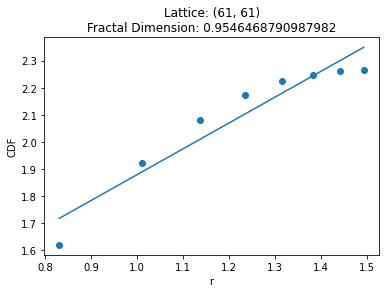

In [66]:

x_discrete = (bin_edg[1:] + bin_edg[0:-1]) /  2
regress = linregress(np.log10(x_discrete), np.log10(DLA_CDF))

x = np.log10(np.linspace(x_discrete[0], x_discrete[-1], 200))
y = regress.slope * x + regress.intercept
plt.title("Lattice: {}\nFractal Dimension: {}".format(DLA_sim.lattice_dim, regress.slope))
plt.ylabel("CDF")
plt.xlabel("r")
plt.plot(x, y)
plt.scatter(np.log10(x_discrete), np.log10(DLA_CDF))

plt.show()